Gemini generated In depth summary 
Based on the video chapters and your code, here is a step-by-step guide to implementing the multi-layer perceptron (MLP) language model.

***

### Part 1: Dataset and Model Architecture

1.  **Create the Dataset**:
    * Load the `names.txt` file and define your character vocabulary (`stoi`, `itos`).
    * Choose a `block_size` (context length), which is the number of previous characters used to predict the next one.
    * Iterate through each word and create a list of contexts (`X`) and their corresponding next characters (`Y`). The `.` token is used to pad the context at the beginning and signal the end of a word.
    * Shuffle the words and split the dataset into **training (80%)**, **validation (10%)**, and **test (10%)** sets. Use `Xtr, Ytr`, `Xdev, Ydev`, and `Xte, Yte` to store these.
2.  **Initialize the Neural Network**:
    * **Embedding Layer**: Create an embedding lookup table `C` as a `27x10` tensor. Each row represents a character, and the 10 values are its **embedding**. This is a trainable parameter.
    * **Hidden Layer**: Define the weights `W1` (a `30x200` tensor, `30` because `block_size * embedding_size = 3 * 10`) and biases `b1` (`200` elements).
    * **Output Layer**: Define the weights `W2` (`200x27`) and biases `b2` (`27` elements). The output size matches the number of characters.
    * Put all these tensors (`C, W1, b1, W2, b2`) into a list called `parameters` and set `requires_grad=True` for all of them. 

***

### Part 2: Training and Evaluation

1.  **Set Up the Training Loop**:
    * Loop for a specified number of iterations (e.g., 200,000).
    * For each iteration, construct a **minibatch** by randomly selecting a small number of indices (`ix`) from your training data `Xtr` and `Ytr`.
2.  **Forward Pass**:
    * Perform an **embedding lookup**: Use `Xtr[ix]` to get the embeddings from `C`, resulting in a tensor of shape `(batch_size, block_size, embedding_size)`.
    * Reshape the embeddings into a single vector per example using `.view(-1, block_size * embedding_size)`.
    * Pass this through the hidden layer: compute `emb.view(...) @ W1 + b1` and apply the **tanh activation function**.
    * Pass the hidden layer output through the output layer: compute `h @ W2 + b2`. This gives you the `logits`.
    * Calculate the **loss** using PyTorch's `F.cross_entropy`, passing in the `logits` and the labels `Ytr[ix]`. This function efficiently combines `softmax`, `log`, and `mean`.
3.  **Backward Pass and Update**:
    * Zero out the gradients for all parameters by setting `p.grad = None` for each parameter `p`.
    * Call `loss.backward()` to compute the gradients.
    * Update the parameters using a learning rate: `p.data += -lr * p.grad`. Use a decaying learning rate, such as starting with `0.1` and dropping to `0.01` after a certain number of steps.
4.  **Evaluate and Visualize**:
    * After training, evaluate the loss on the validation set (`Xdev, Ydev`) to check for **overfitting**.
    * Visualize the embedding space by plotting the first two dimensions of the `C` matrix. Each point represents a character.

***

### Part 3: Sampling and Conclusion

1.  **Sample from the Model**:
    * Start with an initial `context` of all `.` tokens.
    * Enter a loop that continues until the model predicts a `.` token.
    * Inside the loop, get the embeddings for the current `context` from the trained `C` matrix.
    * Perform a forward pass through the hidden and output layers to get the `logits`.
    * Apply `F.softmax` to the logits to get probabilities.
    * Use `torch.multinomial` to sample the index of the next character.
    * Append the new index to your output list and update the `context` by sliding the window.
    * Finally, join the characters from the output list to form a new name.

    ---
    ---

GPT summary walkthrough , with lesser help , covering all ideas in the code 
---
# 🧠 Character-Level MLP Language Model — Complete From-Scratch Walkthrough

This document summarizes the **entire lecture** so you can reimplement the model without looking at the original code.  
It covers **every step**: data prep, architecture, training, and sampling.

---

## 1️⃣ Problem Setup

We want to train a **character-level language model** that generates new names.  
The model will be an **MLP** (multi-layer perceptron) trained from scratch on a dataset of names.

The model’s job:  
Given a **context** (a fixed number of previous characters), predict the **next character**.

---

## 2️⃣ Data Preparation

1. **Load Dataset**  
   - Read the `names.txt` file into a list of strings, one name per line.  
   - Inspect dataset: size, min/max length.

2. **Define Vocabulary**  
   - Collect all unique characters in the dataset.  
   - Add a special `.` token for start/end of a word.  
   - Create two dictionaries:
     - `stoi`: char → index
     - `itos`: index → char

3. **Context Windows**  
   - Choose a fixed context size `block_size` (e.g., 3).  
   - For each name:
     - Pad with `.` tokens at the start.
     - Slide a window of length `block_size` across the name.
     - The window characters are the **input**.
     - The next character is the **target**.

4. **Numerical Encoding**  
   - Map characters in the context and the target to integers using `stoi`.  
   - Store all contexts in an integer tensor `X`.  
   - Store all targets in integer tensor `Y`.

---

## 3️⃣ Model Architecture

The MLP has three main parts:

1. **Embedding Layer**  
   - A learnable matrix `C` of size `(vocab_size, embedding_dim)`.  
   - Converts each character index into a dense vector.

2. **Hidden Layer**  
   - Flatten all embeddings for the context into a single vector.  
   - Apply a linear transformation: `h = tanh(X @ W1 + b1)`  
     - `W1`: weight matrix of shape `(context_size * embedding_dim, hidden_size)`
     - `b1`: bias vector of length `hidden_size`.

3. **Output Layer**  
   - Map hidden activations to vocabulary logits: `logits = h @ W2 + b2`  
     - `W2`: weight matrix `(hidden_size, vocab_size)`
     - `b2`: bias vector `(vocab_size,)`

---

## 4️⃣ Loss Function

We use **cross-entropy loss** between predicted logits and target indices.

Two ways to compute:
1. **Manual**: softmax → log → negative log likelihood → mean over batch.
2. **Built-in**: `torch.nn.functional.cross_entropy(logits, targets)`.

---

## 5️⃣ Training Loop

1. **Initialization**  
   - Randomly initialize all weights with small values (e.g., normal distribution).  
   - Zero biases.

2. **Forward Pass**  
   - Embed context characters → concatenate → hidden layer → output layer.  
   - Compute loss vs targets.

3. **Backward Pass**  
   - Call `.backward()` on loss to compute gradients.

4. **Parameter Update**  
   - Update all parameters with gradient descent:  
     `param -= learning_rate * param.grad`  
   - Zero gradients after each update.

5. **Minibatch Training**  
   - Shuffle dataset each epoch.  
   - Train in batches for efficiency.

6. **Learning Rate Tuning**  
   - Try a small range of learning rates.  
   - Pick one that leads to fastest stable loss decrease.

---

## 6️⃣ Train/Validation/Test Split

- Split dataset: 80% train, 10% val, 10% test.  
- Train only on training set, tune hyperparameters on val set, report final test loss.

---

## 7️⃣ Experiments & Insights

- **Bigger Hidden Layer**: more capacity, better fit.  
- **Bigger Embedding Dim**: richer character representations.  
- **Regularization**: optional L2 penalty to reduce overfitting.

---

## 8️⃣ Sampling from the Model

To generate a name:
1. Start with `.` tokens as context.
2. Predict probability distribution over next char.
3. Sample a char from distribution.
4. Shift context, append new char.
5. Repeat until `.` is generated (end of name).

---

## 9️⃣ Visualizing Embeddings

- After training, the embedding matrix `C` contains a vector for each character.  
- You can plot them in 2D (e.g., PCA or t-SNE) to see relationships between characters.

---

## 🔟 Full Process Recap

1. Load data & build vocab.  
2. Create context–target pairs.  
3. Encode to integers.  
4. Build embedding + MLP layers.  
5. Train with cross-entropy loss.  
6. Tune hyperparameters.  
7. Generate samples.  
8. Visualize learned embeddings.

---

**End Goal**: A fully trained MLP that can generate realistic-looking new names purely from character-level probabilities learned on the training set.

---

In [1]:
# let's code 
print("Hello")

Hello


Video Transcript - summary 
# Multi-Layer Perceptron Language Model Implementation Summary

## Introduction and Problem Statement

This lecture continues implementing "makemore" by transitioning from bigram language models to multi-layer perceptrons (MLPs). The previous bigram model used single character context to predict the next character through count-based probability tables, where each row summed to one.

**Core Problem with Bigram Models:**
- Limited to single character context produces poor, non-name-like predictions
- Scaling to more context creates exponential growth in table size:
  - 1 character context: 27 possibilities
  - 2 character context: 27 × 27 = 729 possibilities  
  - 3 character context: ~20,000 possibilities
- Results in sparse counts and system breakdown

## Theoretical Foundation: Bengio et al. 2003

The implementation follows the influential Bengio et al. 2003 paper on neural language models.

**Paper's Approach:**
- 17,000 word vocabulary embedded in 30-dimensional feature vectors
- Words initially positioned randomly in embedding space
- Through backpropagation, semantically similar words cluster together
- Identical modeling approach: maximize log likelihood of training data

**Key Insight - Generalization Through Embeddings:**
Example: "A dog was running in a ___"
- Even if exact phrase never seen in training, model can generalize
- If seen "The dog was running in a ___", embeddings for "a" and "the" learn similarity
- Knowledge transfers through embedding space to novel scenarios
- Similar concept applies to "cats" and "dogs" as animals

**Neural Network Architecture:**
- Input: 3 previous words (indices 0-16999)
- Embedding lookup table C: 17,000 × 30 matrix
- Each word index retrieves corresponding 30-dimensional embedding
- Input layer: 90 neurons (3 words × 30 dimensions)
- Hidden layer: Hyperparameter size (e.g., 100 neurons), fully connected
- Tanh nonlinearity
- Output layer: 17,000 neurons (one per possible next word), fully connected
- Softmax normalization for probability distribution

**Training Process:**
- Parameters include embedding table C, hidden layer weights/biases, output layer weights/biases
- All optimized via backpropagation
- Most computation in expensive output layer due to vocabulary size

## Implementation Details

### Dataset Preparation
```python
block_size = 3  # Context length (3 characters predict 4th)
```

**Dataset Creation Process:**
- Build examples from character sequences with padding dots
- For word "emma": context [...] → e, [..e] → m, [.em] → m, [emm] → a, [mma] → .
- Generate X (contexts) and Y (target characters) arrays
- 32,000 names total, initially testing on first 5 words (32 examples)

### Embedding Implementation

**Embedding Lookup Table:**
- 27 possible characters embedded in lower-dimensional space
- Start with 2D embeddings for visualization: 27 × 2 matrix C
- Random initialization

**Indexing Methods:**
1. Direct indexing: `C[5]` retrieves 5th row
2. One-hot equivalent: `F.one_hot(torch.tensor(5), 27).float() @ C`
   - Demonstrates embedding as first neural network layer
   - Direct indexing preferred for efficiency

**Batch Processing:**
- PyTorch supports flexible indexing with lists, tensors, multi-dimensional arrays
- `C[X]` embeds entire batch simultaneously
- Output shape: 32 × 3 × 2 (batch_size × context_length × embedding_dim)

### Neural Network Layers

**Hidden Layer Construction:**
- Input: Concatenated embeddings (3 × 2 = 6 dimensions)
- Two concatenation approaches:
  1. `torch.cat([emb[:, 0], emb[:, 1], emb[:, 2]], dim=1)` - creates new tensor
  2. `emb.view(32, 6)` - efficient view manipulation (preferred)

**View Operation Efficiency:**
- PyTorch tensors have underlying 1D storage
- `view()` manipulates tensor metadata (strides, shapes) without copying data
- Extremely efficient compared to concatenation which creates new memory

**Hidden Layer Forward Pass:**
```python
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
```
- W1: 6 × 100 weight matrix
- b1: 100-dimensional bias vector
- Broadcasting ensures bias added to each example

**Output Layer:**
```python
logits = h @ W2 + b2
```
- W2: 100 × 27 weight matrix  
- b2: 27-dimensional bias vector
- Output: 32 × 27 logits

### Loss Calculation

**Manual Implementation:**
```python
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
loss = -prob[torch.arange(32), Y].log().mean()
```

**PyTorch Built-in (Preferred):**
```python
loss = F.cross_entropy(logits, Y)
```

**Advantages of F.cross_entropy:**
1. **Efficiency**: Fused kernels, no intermediate tensors
2. **Numerical stability**: Handles extreme logit values via offset subtraction
3. **Simpler backward pass**: Analytically derived derivatives

**Numerical Stability Example:**
- Large positive logits (e.g., 100) cause overflow in exp()
- F.cross_entropy subtracts maximum logit value internally
- Exploits property: softmax(x) = softmax(x + c) for any constant c

### Training Implementation

**Basic Training Loop:**
```python
for _ in range(1000):
    # Zero gradients
    for p in parameters:
        p.grad = None
    
    # Forward pass
    loss = F.cross_entropy(logits, Y)
    
    # Backward pass
    loss.backward()
    
    # Parameter update
    for p in parameters:
        p.data += -learning_rate * p.grad
```

**Overfitting Demonstration:**
- 3,400 parameters vs 32 examples → easy overfitting
- Achieves very low loss but not exactly zero
- Limitation: same input contexts can have different valid outputs

### Mini-batch Training

**Problem**: Full dataset (228,000 examples) too slow per iteration

**Solution**: Mini-batch gradient descent
```python
ix = torch.randint(0, X.shape[0], (32,))  # Random batch indices
loss = F.cross_entropy(logits[ix], Y[ix])
```

**Benefits:**
- Much faster iterations
- Approximate gradients sufficient for progress
- Better to take many approximate steps than few exact steps

### Learning Rate Selection

**Learning Rate Range Finding:**
1. Test very low rates (e.g., 0.001) → minimal progress
2. Test very high rates (e.g., 0.1, 1.0) → instability/explosion
3. Use exponential spacing: `torch.linspace(-3, 0, 1000)` → `10**lre`
4. Plot learning rate vs loss to find optimal range
5. Choose rate from "valley" region of plot

**Typical Process:**
- Start with found learning rate
- Train until plateau
- Apply learning rate decay (10x reduction)
- Continue training

### Train/Validation/Test Splits

**Problem**: Training loss alone insufficient for model evaluation
- Models can memorize training data (overfitting)
- Need generalization assessment

**Standard Split:**
- **Training (80%)**: Parameter optimization via gradient descent  
- **Validation/Dev (10%)**: Hyperparameter tuning
- **Test (10%)**: Final performance evaluation (use sparingly)

**Implementation:**
```python
n1 = int(0.8 * len(words))  # 80% train
n2 = int(0.9 * len(words))  # 90% train+dev
X_train, Y_train = build_dataset(words[:n1])
X_dev, Y_dev = build_dataset(words[n1:n2])  
X_test, Y_test = build_dataset(words[n2:])
```

### Model Scaling and Optimization

**Underfitting Diagnosis:**
- Training loss ≈ Validation loss indicates underfitting
- Solution: Increase model capacity

**Scaling Experiments:**
1. **Hidden layer size**: 100 → 300 neurons
2. **Embedding dimension**: 2 → 10 dimensions
3. **Context length**: 3 → larger block_size

**Embedding Visualization (2D case):**
- Plot character embeddings after training
- Reveals learned structure: vowels cluster together
- Special characters (q, .) positioned as outliers
- Demonstrates meaningful learned representations

**Final Architecture:**
- 10-dimensional character embeddings
- 200 hidden neurons  
- Input: 30 dimensions (3 characters × 10D embeddings)
- ~11,000 total parameters

**Training Schedule:**
- 100k steps at learning_rate=0.1
- 100k steps at learning_rate=0.01 (decay)
- Achieved ~2.17 validation loss (surpassing 2.45 bigram baseline)

### Sampling from Trained Model

**Generation Process:**
```python
context = [0, 0, 0]  # Start with dots
for _ in range(20):
    emb = C[context]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, 1).item()
    context = context[1:] + [ix]  # Shift context window
    if ix == 0: break  # Stop at end token
```

**Results:**
- Generated names significantly more name-like than bigram model
- Examples: "ham", "joes" - showing improved quality
- Still room for improvement with further optimization

### Optimization Challenges and Improvements

**Available Tuning Parameters:**
1. Hidden layer neuron count
2. Embedding dimensionality  
3. Context length (block_size)
4. Learning rate schedule
5. Batch size
6. Training duration
7. Regularization techniques

**Best Practices:**
- Systematic hyperparameter search rather than random tuning
- Monitor both training and validation performance
- Use learning rate scheduling
- Implement proper gradient tracking and visualization

**Final Performance:**
- Validation loss: 2.17 
- Significant improvement over bigram baseline (2.45)
- Demonstrates effectiveness of neural approach with learned embeddings

This implementation successfully demonstrates the transition from simple statistical models to neural networks, showing how embeddings enable better generalization and the importance of proper training methodology including data splitting and hyperparameter optimization.

In [12]:
# plan of action
# words ,  split into block-sized-context and outputs 
# split into train , dev , testing data
# emdedding vector -> vocab     X embed_dimensions 
# context_size*embed_dimensions X num_neurons_lay_1
# 2nd layer: num_neurons_lay_1  X num_poss_outputs

import torch
import random
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [13]:
# start
words = open("names.txt" , "r").read().splitlines()

chars = set(''.join(words))
chars.add('.')

# itos , stoi

stoi , itos = {} , {}
sorted_chars = sorted(chars)
for index , char in enumerate(sorted_chars):
    stoi[char] =  index
    itos[index] =  char

print("stoi : " , stoi)
print("itos : " , itos)
print()

stoi :  {'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
itos :  {0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}



In [14]:
# create the dataset

block_size = 3

random.seed(42)
random.shuffle(words)

xs , ys = [] , []
for word in words:
    # print(word)
    word = '.' + word + '.'
    context = [0]*block_size
    for i in range(len(word)-1):
        context = context[1:] + [stoi[word[i]]]
        # print(context)
        xs.append(context)
        ys.append(stoi[word[i+1]])

# for i in range(len(xs)):
#     print(xs[i] , ys[i])
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print("input contexts: ",xs)
print()
print("outputs: " , ys)

input contexts:  tensor([[ 0,  0,  0],
        [ 0,  0, 25],
        [ 0, 25, 21],
        ...,
        [15, 22,  1],
        [22,  1, 14],
        [ 1, 14,  9]])

outputs:  tensor([25, 21,  8,  ..., 14,  9,  0])


In [15]:
# spitting the data

n1 = int(0.8*len(xs))
n2 = int(0.9*len(xs))

print(n1,n2)

Xtr = xs[:n1]
Ytr = ys[:n1]

Xdev = xs[n1+1:n2]
Ydev = ys[n1+1:n2]

Xtst = xs[n2+1:]
Ytst = ys[n2+1:]

print(Xtr,Ytr,Xdev,Ydev,Xtst,Ytst)

182516 205331
tensor([[ 0,  0,  0],
        [ 0,  0, 25],
        [ 0, 25, 21],
        ...,
        [ 1,  9, 18],
        [ 0,  0,  0],
        [ 0,  0,  5]]) tensor([25, 21,  8,  ...,  0,  5, 13]) tensor([[ 5, 13, 13],
        [13, 13,  1],
        [13,  1, 12],
        ...,
        [ 9, 25,  1],
        [25,  1,  8],
        [ 0,  0,  0]]) tensor([ 1, 12,  9,  ...,  8,  0, 25]) tensor([[ 0, 25,  1],
        [25,  1, 19],
        [ 1, 19,  9],
        ...,
        [15, 22,  1],
        [22,  1, 14],
        [ 1, 14,  9]]) tensor([19,  9, 14,  ..., 14,  9,  0])


In [16]:
# embedding vector
# hyper paramameters

block_size = 3
emb_size = 2
vocab_size = len(chars)
hidden_layer_neurons = 100
batch_size = int(0.001 * len(Xtr))
print("Mini batch size : ",batch_size)

hyper_params = [block_size , emb_size , vocab_size , hidden_layer_neurons ]

# parameters

g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.rand((vocab_size , emb_size) , dtype = torch.float32 , requires_grad = True) # 27 x 2
print(C)

W1 = torch.rand((block_size * emb_size , hidden_layer_neurons  ) , dtype = torch.float32 , requires_grad = True) # 2*3 = 6 x 100
b1 = torch.rand(hidden_layer_neurons , dtype = torch.float32 , requires_grad = True) # 100

W2 = torch.rand(( hidden_layer_neurons , vocab_size ) , dtype = torch.float32 , requires_grad = True) # 100 x 27
b2 = torch.rand(vocab_size , dtype = torch.float32 , requires_grad = True) # 27

params = [C , W1, b1 , W2 , b2]

Mini batch size :  182
tensor([[0.7527, 0.2817],
        [0.2033, 0.9314],
        [0.0549, 0.1911],
        [0.7158, 0.3366],
        [0.0568, 0.8681],
        [0.8554, 0.1613],
        [0.7478, 0.4793],
        [0.9906, 0.4357],
        [0.4126, 0.8507],
        [0.0534, 0.0312],
        [0.1611, 0.9592],
        [0.1851, 0.1465],
        [0.3875, 0.1873],
        [0.6557, 0.3573],
        [0.5957, 0.5723],
        [0.3342, 0.1650],
        [0.5214, 0.7073],
        [0.8481, 0.6371],
        [0.5115, 0.8399],
        [0.6694, 0.3740],
        [0.8157, 0.2177],
        [0.5909, 0.1473],
        [0.2452, 0.2820],
        [0.0612, 0.8966],
        [0.4225, 0.7124],
        [0.0726, 0.2355],
        [0.5372, 0.1577]], requires_grad=True)


In [17]:
print(params)

[tensor([[0.7527, 0.2817],
        [0.2033, 0.9314],
        [0.0549, 0.1911],
        [0.7158, 0.3366],
        [0.0568, 0.8681],
        [0.8554, 0.1613],
        [0.7478, 0.4793],
        [0.9906, 0.4357],
        [0.4126, 0.8507],
        [0.0534, 0.0312],
        [0.1611, 0.9592],
        [0.1851, 0.1465],
        [0.3875, 0.1873],
        [0.6557, 0.3573],
        [0.5957, 0.5723],
        [0.3342, 0.1650],
        [0.5214, 0.7073],
        [0.8481, 0.6371],
        [0.5115, 0.8399],
        [0.6694, 0.3740],
        [0.8157, 0.2177],
        [0.5909, 0.1473],
        [0.2452, 0.2820],
        [0.0612, 0.8966],
        [0.4225, 0.7124],
        [0.0726, 0.2355],
        [0.5372, 0.1577]], requires_grad=True), tensor([[0.7663, 0.6894, 0.3538, 0.2931, 0.3713, 0.3765, 0.9100, 0.8898, 0.3008,
         0.0273, 0.1510, 0.8006, 0.2410, 0.3726, 0.3389, 0.2516, 0.4059, 0.9994,
         0.7011, 0.0780, 0.3129, 0.4530, 0.4071, 0.9581, 0.6904, 0.9906, 0.2155,
         0.2228, 0.1232, 0.2588,

In [18]:
# create mini_batch
ix = torch.randint(0, len(Xtr), (batch_size,))
X = Xtr[ix]
Y = Ytr[ix]
emb = C[X]

emb

tensor([[[0.7527, 0.2817],
         [0.7527, 0.2817],
         [0.8554, 0.1613]],

        [[0.7527, 0.2817],
         [0.5957, 0.5723],
         [0.5909, 0.1473]],

        [[0.7527, 0.2817],
         [0.7527, 0.2817],
         [0.7527, 0.2817]],

        ...,

        [[0.7527, 0.2817],
         [0.7527, 0.2817],
         [0.0534, 0.0312]],

        [[0.5957, 0.5723],
         [0.6694, 0.3740],
         [0.3875, 0.1873]],

        [[0.5115, 0.8399],
         [0.0534, 0.0312],
         [0.2033, 0.9314]]], grad_fn=<IndexBackward0>)

In [19]:
emb.shape

torch.Size([182, 3, 2])

In [20]:
hidden = torch.tanh(emb.view( batch_size , block_size * emb_size) @ W1 + b1)

In [21]:
hidden.shape

torch.Size([182, 100])

In [22]:
logits = (hidden @ W2 + b2)
logits

tensor([[49.6128, 45.6185, 50.7606,  ..., 47.0404, 49.5229, 48.5530],
        [49.5391, 45.5440, 50.6587,  ..., 46.9571, 49.4384, 48.4427],
        [49.6741, 45.7097, 50.8300,  ..., 47.1248, 49.5989, 48.6100],
        ...,
        [46.9522, 43.2013, 47.9268,  ..., 44.5639, 46.7792, 45.9611],
        [49.1536, 45.1711, 50.1556,  ..., 46.5931, 49.0643, 48.0595],
        [47.5058, 43.6668, 48.0797,  ..., 44.7660, 47.3657, 46.1493]],
       grad_fn=<AddBackward0>)

In [23]:
logits.shape

torch.Size([182, 27])

In [24]:
counts = logits.exp()
counts

tensor([[3.5201e+21, 6.4841e+19, 1.1093e+22,  ..., 2.6878e+20, 3.2177e+21,
         1.2199e+21],
        [3.2699e+21, 6.0189e+19, 1.0019e+22,  ..., 2.4728e+20, 2.9568e+21,
         1.0924e+21],
        [3.7426e+21, 7.1032e+19, 1.1891e+22,  ..., 2.9244e+20, 3.4717e+21,
         1.2914e+21],
        ...,
        [2.4609e+20, 5.7820e+18, 6.5214e+20,  ..., 2.2588e+19, 2.0698e+20,
         9.1338e+19],
        [2.2241e+21, 4.1453e+19, 6.0573e+21,  ..., 1.7184e+20, 2.0340e+21,
         7.4467e+20],
        [4.2805e+20, 9.2101e+18, 7.5985e+20,  ..., 2.7645e+19, 3.7210e+20,
         1.1025e+20]], grad_fn=<ExpBackward0>)

In [27]:
probs = counts / counts.sum(1 , keepdim=True)
print(probs)

loss = - probs[torch.arange(batch_size) , Y].log().mean()
loss

tensor([[0.0137, 0.0003, 0.0431,  ..., 0.0010, 0.0125, 0.0047],
        [0.0144, 0.0003, 0.0442,  ..., 0.0011, 0.0130, 0.0048],
        [0.0134, 0.0003, 0.0425,  ..., 0.0010, 0.0124, 0.0046],
        ...,
        [0.0148, 0.0003, 0.0393,  ..., 0.0014, 0.0125, 0.0055],
        [0.0146, 0.0003, 0.0399,  ..., 0.0011, 0.0134, 0.0049],
        [0.0180, 0.0004, 0.0320,  ..., 0.0012, 0.0157, 0.0046]],
       grad_fn=<DivBackward0>)


tensor(5.5585, grad_fn=<NegBackward0>)

In [40]:
# this manual way of calculating is annoying , makes for worse backprop and creates issues like storing inf and nan
# instead , we use the inbuild softmax function that allows for better backprop using analytically derived derivatives , and 
# it first subtracts the largest value from each row before raises exp hence no inf and nan


In [42]:
loss = F.cross_entropy(logits , Y)
loss

tensor(5.5585, grad_fn=<NllLossBackward0>)

In [44]:
print("Number of parameters are " , sum (p.nelement() for p in params))

Number of parameters are  3481


In [46]:
# now we put it together and build the loop

# embedding vector
# hyper paramameters

block_size = 3
emb_size = 2
vocab_size = len(chars)
hidden_layer_neurons = 100
batch_size = int(0.0004 * len(Xtr))
print("Mini batch size : ",batch_size)

hyper_params = [block_size , emb_size , vocab_size , hidden_layer_neurons ]

# parameters

g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.rand((vocab_size , emb_size) , dtype = torch.float32 , requires_grad = True) # 27 x 2

W1 = torch.rand((block_size * emb_size , hidden_layer_neurons  ) , dtype = torch.float32 , requires_grad = True) # 2*3 = 6 x 100
b1 = torch.rand(hidden_layer_neurons , dtype = torch.float32 , requires_grad = True) # 100

W2 = torch.rand(( hidden_layer_neurons , vocab_size ) , dtype = torch.float32 , requires_grad = True) # 100 x 27
b2 = torch.rand(vocab_size , dtype = torch.float32 , requires_grad = True) # 27

params = [C , W1, b1 , W2 , b2]
print("Number of parameters are " , sum (p.nelement() for p in params))

# create mini_batch
ix = torch.randint(0, len(Xtr), (batch_size,))
X = Xtr[ix]
Y = Ytr[ix]


Mini batch size :  73
Number of parameters are  3481


In [48]:
# number of iterations
num_itr = 10000

# learning rate
lr = 0.1

for i in range(num_itr):
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i < 500 and i%10 ==0) or (i%100==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * lr
    


Iteration 0 : loss = 6.096681594848633
Iteration 10 : loss = 2.4468793869018555
Iteration 20 : loss = 2.3523387908935547
Iteration 30 : loss = 2.3103601932525635
Iteration 40 : loss = 2.276505470275879
Iteration 50 : loss = 2.243818759918213
Iteration 60 : loss = 2.2092368602752686
Iteration 70 : loss = 2.172192096710205
Iteration 80 : loss = 2.133417844772339
Iteration 90 : loss = 2.0935401916503906
Iteration 100 : loss = 2.0528554916381836
Iteration 110 : loss = 2.0116307735443115
Iteration 120 : loss = 1.9702117443084717
Iteration 130 : loss = 1.9290416240692139
Iteration 140 : loss = 1.88858163356781
Iteration 150 : loss = 1.8492755889892578
Iteration 160 : loss = 1.8114534616470337
Iteration 170 : loss = 1.7752493619918823
Iteration 180 : loss = 1.740578055381775
Iteration 190 : loss = 1.7071809768676758
Iteration 200 : loss = 1.6747406721115112
Iteration 210 : loss = 1.642964482307434
Iteration 220 : loss = 1.611635684967041
Iteration 230 : loss = 1.5806138515472412
Iteration 240

In [343]:
# we achieve a super low loss here coz we are overfitting this batch pf 182 samples - and 3480 params !!
# and ya we cannot make loss zero , coz for most inputs , there are multple poss outputs so that wont ever happen
# ... is supposed to predict a , o , e , etc (depeinid on all the starting letters of diferent names) 
# hence the prob for those will always be less than 1 , and so on

# so for a more general loss , we use the whole data set , and take random minibatches of it in each iteration ,
# making the learning faster , 


In [405]:
# number of iterations
num_itr = 5000

# learning rate
lr = 0.1

for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i < 500 and i%10 ==0) or (i%60==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * lr

Iteration 0 : loss = 6.659937381744385
Iteration 10 : loss = 3.1696622371673584
Iteration 20 : loss = 2.588441848754883
Iteration 30 : loss = 2.6085712909698486
Iteration 40 : loss = 2.608804941177368
Iteration 50 : loss = 2.8086557388305664
Iteration 60 : loss = 3.0225093364715576
Iteration 70 : loss = 2.7730066776275635
Iteration 80 : loss = 2.685441017150879
Iteration 90 : loss = 2.66339373588562
Iteration 100 : loss = 2.895890235900879
Iteration 110 : loss = 2.855465888977051
Iteration 120 : loss = 2.8565545082092285
Iteration 130 : loss = 2.793809175491333
Iteration 140 : loss = 2.7147655487060547
Iteration 150 : loss = 2.6752076148986816
Iteration 160 : loss = 2.7418243885040283
Iteration 170 : loss = 2.687063455581665
Iteration 180 : loss = 2.671304941177368
Iteration 190 : loss = 2.6645584106445312
Iteration 200 : loss = 2.690342664718628
Iteration 210 : loss = 2.737016201019287
Iteration 220 : loss = 2.6932904720306396
Iteration 230 : loss = 2.7163822650909424
Iteration 240 : 

In [357]:
# now we get a way more accurate loss , but still , it isnt good enough and also we see that after 140 ish iterations
# the loss becomes wavy and doesnt decline in the steady way we would want it to ...
# this is because of the random choice of learning rate

# SO LETS try to find a good learning rate... and the arrays of possible learning rates has to be spaced exponentially instead 
# of linearly because , there are just as many important lr in 10^-2 to 10^-1 as there are in 10^-1 to 1 


In [369]:
lre = torch.linspace(-3,0,1000)
print(lre)
lrs = 10**lre
print(lrs)

tensor([-3.0000, -2.9970, -2.9940, -2.9910, -2.9880, -2.9850, -2.9820, -2.9790,
        -2.9760, -2.9730, -2.9700, -2.9670, -2.9640, -2.9610, -2.9580, -2.9550,
        -2.9520, -2.9489, -2.9459, -2.9429, -2.9399, -2.9369, -2.9339, -2.9309,
        -2.9279, -2.9249, -2.9219, -2.9189, -2.9159, -2.9129, -2.9099, -2.9069,
        -2.9039, -2.9009, -2.8979, -2.8949, -2.8919, -2.8889, -2.8859, -2.8829,
        -2.8799, -2.8769, -2.8739, -2.8709, -2.8679, -2.8649, -2.8619, -2.8589,
        -2.8559, -2.8529, -2.8498, -2.8468, -2.8438, -2.8408, -2.8378, -2.8348,
        -2.8318, -2.8288, -2.8258, -2.8228, -2.8198, -2.8168, -2.8138, -2.8108,
        -2.8078, -2.8048, -2.8018, -2.7988, -2.7958, -2.7928, -2.7898, -2.7868,
        -2.7838, -2.7808, -2.7778, -2.7748, -2.7718, -2.7688, -2.7658, -2.7628,
        -2.7598, -2.7568, -2.7538, -2.7508, -2.7477, -2.7447, -2.7417, -2.7387,
        -2.7357, -2.7327, -2.7297, -2.7267, -2.7237, -2.7207, -2.7177, -2.7147,
        -2.7117, -2.7087, -2.7057, -2.70

In [409]:
# number of iterations
num_itr = 1000

# learning rate
step_i = []


for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    step_i.append(loss.item())
    if (i < 500 and i%10 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * lrs[i]
        

Iteration 0 : loss = 5.772871017456055
Iteration 10 : loss = 5.655272006988525
Iteration 20 : loss = 4.666193008422852
Iteration 30 : loss = 4.825325012207031
Iteration 40 : loss = 4.83458137512207
Iteration 50 : loss = 4.527675628662109
Iteration 60 : loss = 4.254375457763672
Iteration 70 : loss = 4.5882134437561035
Iteration 80 : loss = 3.946962594985962
Iteration 90 : loss = 4.379844665527344
Iteration 100 : loss = 3.6341092586517334
Iteration 110 : loss = 4.11574125289917
Iteration 120 : loss = 3.758052349090576
Iteration 130 : loss = 3.6755480766296387
Iteration 140 : loss = 3.429736375808716
Iteration 150 : loss = 3.7399508953094482
Iteration 160 : loss = 3.4781689643859863
Iteration 170 : loss = 3.3962461948394775
Iteration 180 : loss = 3.4423775672912598
Iteration 190 : loss = 3.229177713394165
Iteration 200 : loss = 3.2683932781219482
Iteration 210 : loss = 3.2741427421569824
Iteration 220 : loss = 3.28713321685791
Iteration 230 : loss = 3.0736091136932373
Iteration 240 : loss

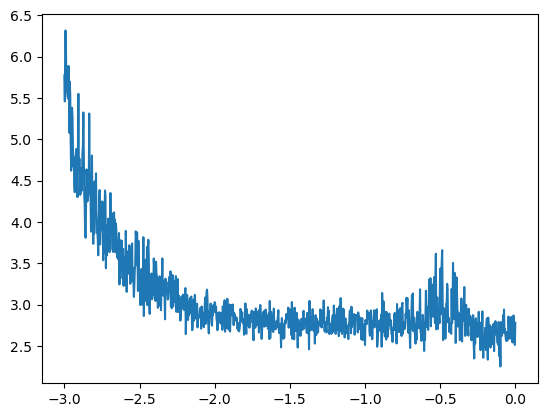

In [411]:
plt.plot(lre , step_i)

In [399]:
# around the valley region is a good lr -> 10^-1 = 0.1 was p good anyways , we choose it 

In [68]:
# re -run it

# now we put it together and build the loop

# embedding vector
# hyper paramameters

block_size = 3
emb_size = 2
vocab_size = len(chars)
hidden_layer_neurons = 100
batch_size = int(0.0004 * len(Xtr))
print("Mini batch size : ",batch_size)

hyper_params = [block_size , emb_size , vocab_size , hidden_layer_neurons ]

# parameters

g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.rand((vocab_size , emb_size) , dtype = torch.float32 , requires_grad = True) # 27 x 2

W1 = torch.rand((block_size * emb_size , hidden_layer_neurons  ) , dtype = torch.float32 , requires_grad = True) # 2*3 = 6 x 100
b1 = torch.rand(hidden_layer_neurons , dtype = torch.float32 , requires_grad = True) # 100

W2 = torch.rand(( hidden_layer_neurons , vocab_size ) , dtype = torch.float32 , requires_grad = True) # 100 x 27
b2 = torch.rand(vocab_size , dtype = torch.float32 , requires_grad = True) # 27

params = [C , W1, b1 , W2 , b2]
print("Number of parameters are " , sum (p.nelement() for p in params))

# create mini_batch
ix = torch.randint(0, len(Xtr), (batch_size,))
X = Xtr[ix]
Y = Ytr[ix]


# number of iterations
num_itr = 6500


for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i <= 500 and i%50 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * 0.1

for i in range(num_itr//2):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i <= 500 and i%50 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * 0.1


for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i <= 500 and i%50 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * 0.004

Mini batch size :  73
Number of parameters are  3481
Iteration 0 : loss = 6.840943813323975
Iteration 50 : loss = 2.736565589904785
Iteration 100 : loss = 2.959373950958252
Iteration 150 : loss = 2.9321553707122803
Iteration 200 : loss = 2.608616352081299
Iteration 250 : loss = 2.6531906127929688
Iteration 300 : loss = 2.5715901851654053
Iteration 350 : loss = 2.8651652336120605
Iteration 400 : loss = 2.5243003368377686
Iteration 450 : loss = 2.585402250289917
Iteration 500 : loss = 2.7416810989379883
Iteration 1000 : loss = 2.6344711780548096
Iteration 2000 : loss = 2.613267660140991
Iteration 3000 : loss = 2.1018881797790527
Iteration 4000 : loss = 2.4590818881988525
Iteration 5000 : loss = 2.4312853813171387
Iteration 6000 : loss = 2.3602845668792725
Iteration 0 : loss = 2.480874538421631
Iteration 50 : loss = 2.344879388809204
Iteration 100 : loss = 2.45853590965271
Iteration 150 : loss = 2.4404802322387695
Iteration 200 : loss = 2.3182945251464844
Iteration 250 : loss = 2.24398589

In [425]:
# we continue running it till we get stagnated then we do a learning rate decay

In [427]:
#  now we test on dev split
ix = torch.randint(0, len(Xdev), (batch_size,))
X = Xdev[ix]
Y = Ydev[ix]

# forward pass
emb = C[X]
hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
logits = hidden @ W2 + b2
loss = F.cross_entropy(logits,Y)
print(loss)

tensor(2.3029, grad_fn=<NllLossBackward0>)


In [429]:
# dev has the same as training => we are prolly underfitting , which is good , so we should increase params and imrpve loss

In [70]:
# re -run it

# now we put it together and build the loop

# embedding vector
# hyper paramameters

block_size = 3
emb_size = 6
vocab_size = len(chars)
hidden_layer_neurons = 250
batch_size = int(0.0003 * len(Xtr))
print("Mini batch size : ",batch_size)

hyper_params = [block_size , emb_size , vocab_size , hidden_layer_neurons ]

# parameters

g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.rand((vocab_size , emb_size) , dtype = torch.float32 , requires_grad = True) # 27 x 2

W1 = torch.rand((block_size * emb_size , hidden_layer_neurons  ) , dtype = torch.float32 , requires_grad = True) # 2*3 = 6 x 100
b1 = torch.rand(hidden_layer_neurons , dtype = torch.float32 , requires_grad = True) # 100

W2 = torch.rand(( hidden_layer_neurons , vocab_size ) , dtype = torch.float32 , requires_grad = True) # 100 x 27
b2 = torch.rand(vocab_size , dtype = torch.float32 , requires_grad = True) # 27

params = [C , W1, b1 , W2 , b2]
print("Number of parameters are " , sum (p.nelement() for p in params))

# create mini_batch
ix = torch.randint(0, len(Xtr), (batch_size,))
X = Xtr[ix]
Y = Ytr[ix]


# number of iterations
num_itr = 6500


for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i <= 500 and i%50 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * (0.1 if i <2500 else 0.07)

for i in range(num_itr//2):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i <= 500 and i%50 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * (0.07 if i <2000 else 0.04)


for i in range(num_itr):
    # minibatches
    ix = torch.randint(0, len(Xtr), (batch_size,))
    X = Xtr[ix]
    Y = Ytr[ix]
    
    # forward pass
    emb = C[X]
    hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
    logits = hidden @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    if (i <= 500 and i%50 ==0) or (i%1000==0):
        print(f'Iteration {i} : loss = {loss}')

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    for p in params:
        p.data -= p.grad * 0.01

Mini batch size :  54
Number of parameters are  11689
Iteration 0 : loss = 6.656859874725342
Iteration 50 : loss = 5.601961612701416
Iteration 100 : loss = 4.919982433319092
Iteration 150 : loss = 7.149423599243164
Iteration 200 : loss = 3.5995101928710938
Iteration 250 : loss = 4.37211799621582
Iteration 300 : loss = 3.8503780364990234
Iteration 350 : loss = 4.510227203369141
Iteration 400 : loss = 4.672175884246826
Iteration 450 : loss = 5.279562473297119
Iteration 500 : loss = 4.507297515869141
Iteration 1000 : loss = 3.525667905807495
Iteration 2000 : loss = 2.932100296020508
Iteration 3000 : loss = 2.7891972064971924
Iteration 4000 : loss = 2.172273874282837
Iteration 5000 : loss = 2.340963363647461
Iteration 6000 : loss = 2.322680711746216
Iteration 0 : loss = 2.336848258972168
Iteration 50 : loss = 2.443117141723633
Iteration 100 : loss = 2.629903793334961
Iteration 150 : loss = 2.3595926761627197
Iteration 200 : loss = 2.3969497680664062
Iteration 250 : loss = 2.387308120727539

In [72]:
#  now we test on dev split
ix = torch.randint(0, len(Xdev), (batch_size,))
X = Xdev[ix]
Y = Ydev[ix]

# forward pass
emb = C[X]
hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
logits = hidden @ W2 + b2
loss = F.cross_entropy(logits,Y)
print(loss)

tensor(2.2258, grad_fn=<NllLossBackward0>)


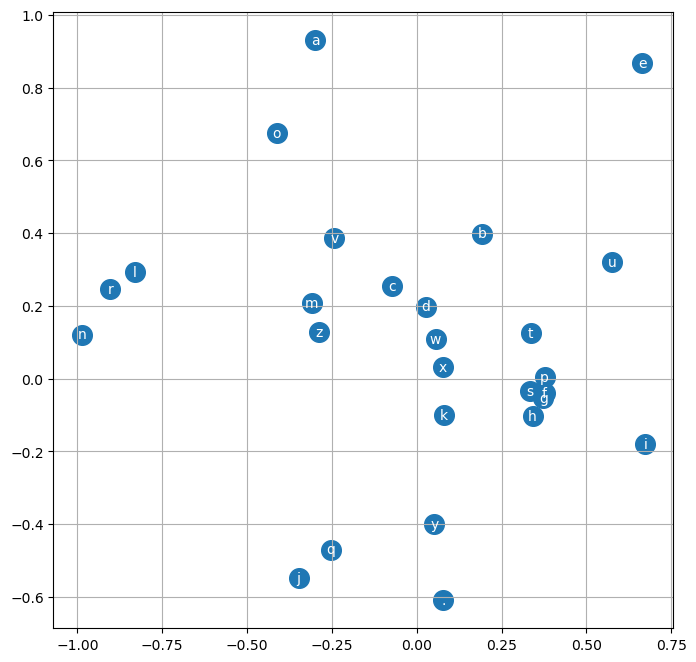

In [445]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
# only for 2 dim  vectors 
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [74]:
#  now we test on test split
ix = torch.randint(0, len(Xtst), (batch_size,))
X = Xtst[ix]
Y = Ytst[ix]

# forward pass
emb = C[X]
hidden = torch.tanh(emb.view(batch_size , block_size*emb_size)  @ W1 + b1)
logits = hidden @ W2 + b2
loss = F.cross_entropy(logits,Y)
print(loss)

tensor(2.3111, grad_fn=<NllLossBackward0>)


In [87]:
# let's sample

for _ in range(10):
    context = [0]*block_size
    outs = []
    while True:
        emb = C[torch.tensor(context)]
        hidden = torch.tanh(emb.view(1 , block_size*emb_size) @ W1 + b1)
        logits = hidden @ W2 + b2
        probs = F.softmax(logits, dim=1)
        next = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [next]
        outs += [itos[next]]
        if next == 0:
            break

    print("".join(outs))

   

certca.
vakipi.
reah.
deron.
marikdssemy.
nivin.
ielioderdie.
xagre.
mak.
erlepsganie.
